In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.model_selection import train_test_split

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2023-02-08 20:07:42--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2023-02-08 20:07:43 (32.3 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
# Convert categorical data to numeric
for column in dataset.columns:
  if dataset[column].dtype == 'object':
    dataset[column] = pd.Categorical(dataset[column]).codes

# Split dataset into training and testing
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

# Create training labels and testing labels
train_labels, test_labels = train_dataset.pop('expenses'), test_dataset.pop('expenses')

#Create model
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))
model = keras.Sequential([
    normalizer,
    layers.Dense(2),
    layers.Dense(1)
])
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error',
    metrics=['mae', 'mse']
)
model.fit(train_dataset,
          train_labels,
          epochs=80,
          validation_split=0.2)

Epoch 1/80
27/27 [==============================] - 1s 8ms/step - loss: 13314.9951 - mae: 13314.9951 - mse: 321201088.0000 - val_loss: 12991.5869 - val_mae: 12991.5869 - val_mse: 312116960.0000
Epoch 2/80
27/27 [==============================] - 0s 4ms/step - loss: 13271.9580 - mae: 13271.9580 - mse: 320074944.0000 - val_loss: 12918.7998 - val_mae: 12918.7998 - val_mse: 310300096.0000
Epoch 3/80
27/27 [==============================] - 0s 4ms/step - loss: 13165.4443 - mae: 13165.4443 - mse: 317236992.0000 - val_loss: 12774.0225 - val_mae: 12774.0225 - val_mse: 306526816.0000
Epoch 4/80
27/27 [==============================] - 0s 4ms/step - loss: 12982.4395 - mae: 12982.4395 - mse: 312240896.0000 - val_loss: 12552.5254 - val_mae: 12552.5254 - val_mse: 300651552.0000
Epoch 5/80
27/27 [==============================] - 0s 6ms/step - loss: 12714.8799 - mae: 12714.8799 - mse: 305336064.0000 - val_loss: 12244.6836 - val_mae: 12244.6836 - val_mse: 293224320.0000
Epoch 6/80
27/27 [============

9/9 - 0s - loss: 2951.3435 - mae: 2951.3435 - mse: 39310868.0000 - 48ms/epoch - 5ms/step
Testing set Mean Abs Error: 2951.34 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


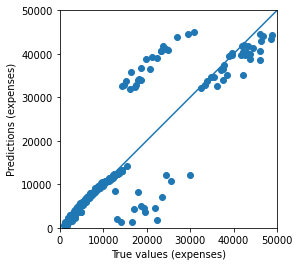

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
